Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection

In [2]:
calories = pd.read_csv('Dataset/calories.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise = pd.read_csv('Dataset/exercise.csv')

In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two DFs

In [6]:
df = pd.concat([exercise, calories['Calories']], axis = 1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.shape

(15000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [11]:
# get statistical measures
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [12]:
sns.set()

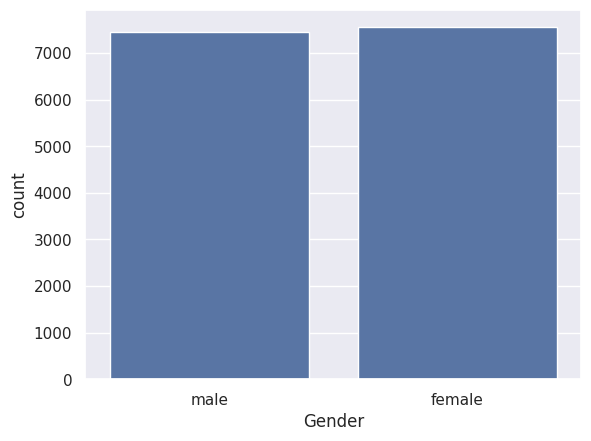

In [15]:
sns.countplot(x='Gender', data=df)
plt.show()

/tmp/ipykernel_19999/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

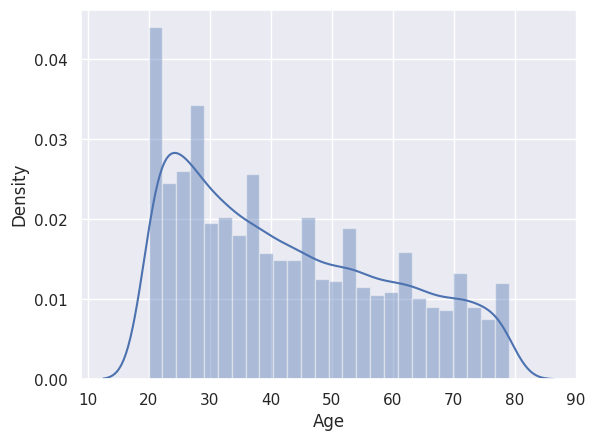

In [16]:
sns.distplot(df['Age'])

/tmp/ipykernel_19999/3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

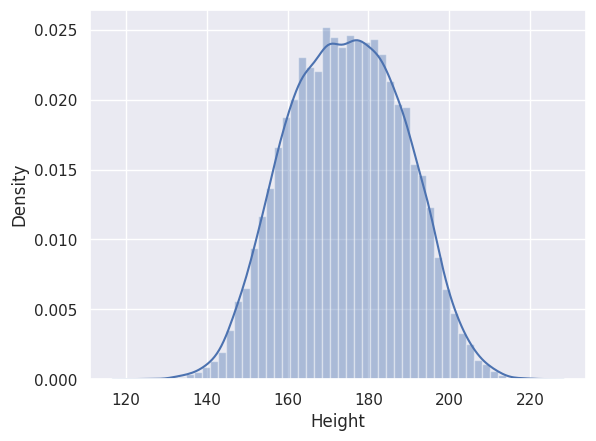

In [21]:
sns.distplot(df['Height'])

/tmp/ipykernel_19999/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

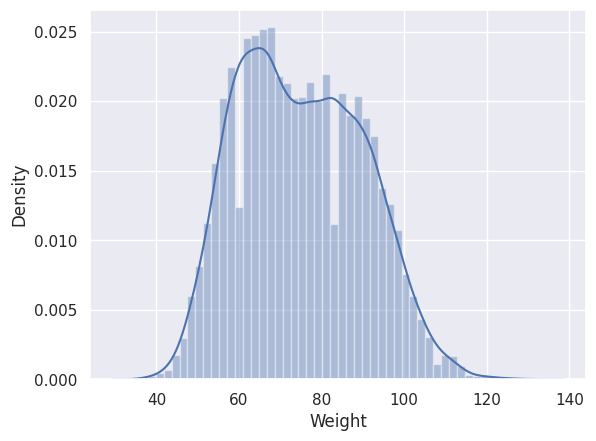

In [22]:
sns.distplot(df['Weight'])

Finding Correlation

In [31]:
# Map male/female to numeric values
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})


In [32]:
correlation = df.corr()

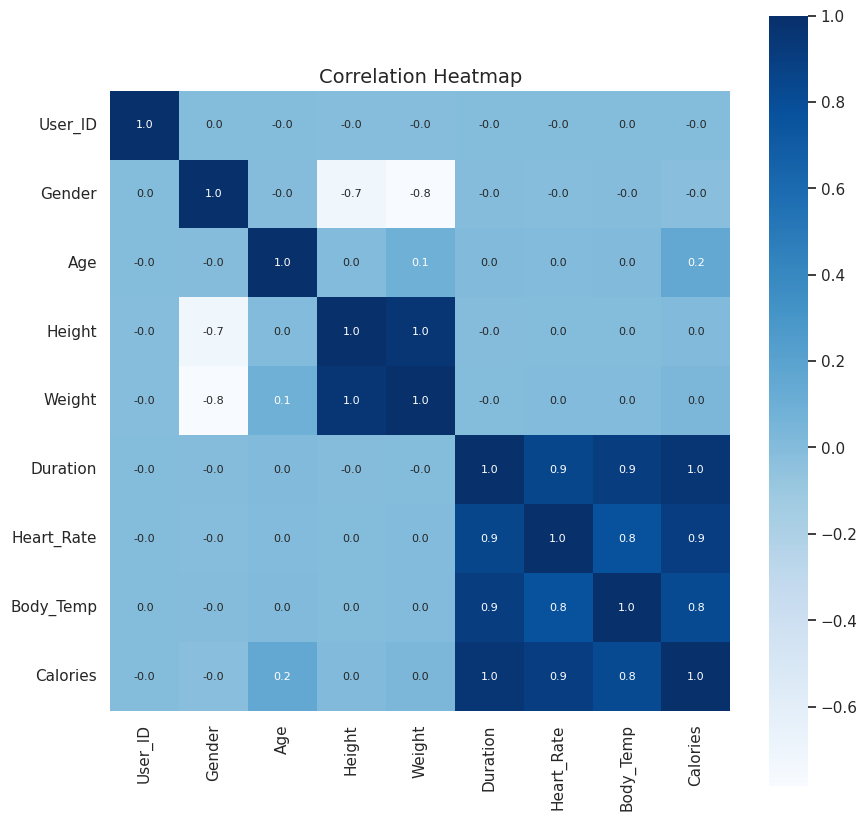

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size':8},
    cmap='Blues'
)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [34]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating Features and Target

In [39]:
X = df.drop(['Calories', 'User_ID'], axis=1)
Y = df['Calories']

In [41]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


Splitting the data into training and test data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

Model Training

In [43]:
model = XGBRegressor()

In [44]:
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [45]:
Y_train_pred = model.predict(X_train)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE (Mean Absolute Error): Average absolute difference between predicted and actual calories. Lower = better.

RMSE (Root Mean Squared Error): Similar to MAE but penalizes larger errors more.

R² Score: Measures how well the model fits the data.

1.0 = perfect fit

~0.8–0.9 = very good

<0.5 = weak model (underfitting)

In [47]:
mae_train = mean_absolute_error(Y_train, Y_train_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)

print("Training Results:")
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

Training Results:
MAE: 0.9322033420062313
RMSE: 1.2952502203949643
R² Score: 0.9995691477017405


In [48]:
Y_test_pred = model.predict(X_test)

mae_test = mean_absolute_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_test = r2_score(Y_test, Y_test_pred)

print("Test Results:")
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)


Test Results:
MAE: 1.4833678883314132
RMSE: 2.1704170134933394
R² Score: 0.998800624504713


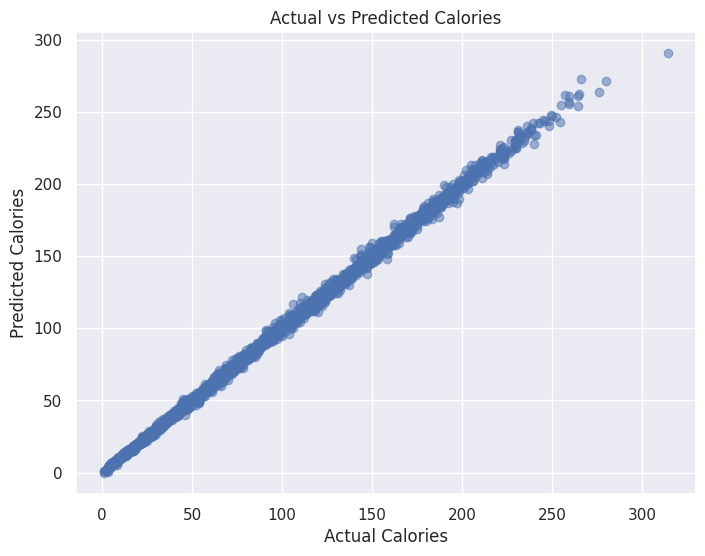

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_test_pred, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

In [52]:
def predict_calories(age, gender, height, weight, duration, heart_rate, body_temp):
    # Convert gender to numeric
    gender_num = 0 if gender.lower() == 'male' else 1
    
    # Create input DataFrame
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender_num],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [body_temp]
    })
    
    # Reorder columns to match X_train
    input_data = input_data[X_train.columns]
    
    # Predict calories
    predicted_calories = model.predict(input_data)
    
    return predicted_calories[0]

age = int(input("Enter Age: "))
gender = input("Enter Gender (male/female): ")
height = float(input("Enter Height (cm): "))
weight = float(input("Enter Weight (kg): "))
duration = float(input("Enter Duration (minutes): "))
heart_rate = float(input("Enter Heart Rate: "))
body_temp = float(input("Enter Body Temp (°C): "))

calories_burned = predict_calories(age, gender, height, weight, duration, heart_rate, body_temp)
print(f"Predicted Calories Burned: {calories_burned:.2f}")



Predicted Calories Burned: 140.17
